In [1]:
import extract 

import pandas as pd 
import numpy as np 

In [2]:
extractlist = extract.extract(2022091200, 109)

defense = extract.separate(extractlist)[0]
offense = extract.separate(extractlist)[2]

print(offense)

print(defense)

[           name position  player_x  player_y  player_a  player_s  player_dir  \
1    Geno Smith       QB     41.49     22.88      0.48      0.50      350.68   
2    Geno Smith       QB     41.49     22.93      0.42      0.56      352.90   
3    Geno Smith       QB     41.49     22.99      0.43      0.63      356.81   
4    Geno Smith       QB     41.48     23.06      0.35      0.66      357.04   
5    Geno Smith       QB     41.48     23.12      0.22      0.68      356.78   
..          ...      ...       ...       ...       ...       ...         ...   
203  Geno Smith       QB     44.60     20.11      0.99      3.41       97.24   
204  Geno Smith       QB     44.94     20.08      0.95      3.41       95.17   
205  Geno Smith       QB     45.28     20.05      0.87      3.39       93.75   
206  Geno Smith       QB     45.62     20.03      0.88      3.35       92.32   
207  Geno Smith       QB     45.95     20.02      0.82      3.32       91.43   

     player_dis               outcome 

In [5]:
d_names = []
o_names = []
for d in defense:
    d_names.append(d.at[1, 'name'])

for o in offense:
    o_names.append(o.at[1, 'name'])

In [13]:
d_xy = []
o_xy = []

for player_name in d_names:
    defense_df = next(df for df in defense if df['name'].iloc[0] == player_name)
    xy_to_append = defense_df[['player_x', 'player_y']]
    d_xy.append(xy_to_append)
    
for player_name in o_names:
    offense_df = next(df for df in offense if df['name'].iloc[0] == player_name)
    xy_to_append = offense_df[['player_x', 'player_y']]
    o_xy.append(xy_to_append)


In [18]:
print(d_xy)

[     player_x  player_y
1       52.88     26.99
2       53.01     27.03
3       53.13     27.06
4       53.25     27.10
5       53.38     27.13
..        ...       ...
203     64.40     32.31
204     64.53     32.25
205     64.64     32.19
206     64.72     32.16
207     64.79     32.14

[207 rows x 2 columns],      player_x  player_y
1       50.78     29.12
2       50.88     29.20
3       50.97     29.29
4       51.05     29.37
5       51.14     29.45
..        ...       ...
203     58.09     16.10
204     58.46     16.33
205     58.81     16.56
206     59.16     16.78
207     59.50     17.01

[207 rows x 2 columns],      player_x  player_y
1       52.17     22.60
2       52.22     22.61
3       52.28     22.62
4       52.34     22.64
5       52.40     22.64
..        ...       ...
203     63.92     50.47
204     63.87     50.38
205     63.84     50.26
206     63.82     50.13
207     63.81     49.99

[207 rows x 2 columns],      player_x  player_y
1       47.44     28.20
2       47.4

In [43]:
dx_list = []
dy_list = []

for xy in d_xy:
    dx_list.append(xy['player_x'])
    dy_list.append(xy['player_y'])
    
#print(dx_list)

ox_list = []
oy_list = []

for xy in o_xy:
    ox_list.append(xy['player_x'])
    oy_list.append(xy['player_y'])
    
print(ox_list)




[1      41.49
2      41.49
3      41.49
4      41.48
5      41.48
       ...  
203    44.60
204    44.94
205    45.28
206    45.62
207    45.95
Name: player_x, Length: 207, dtype: float64, 1      40.28
2      40.29
3      40.29
4      40.30
5      40.30
       ...  
203    57.70
204    57.81
205    57.92
206    58.01
207    58.11
Name: player_x, Length: 207, dtype: float64, 1      42.73
2      42.85
3      42.98
4      43.12
5      43.25
       ...  
203    46.02
204    46.26
205    46.50
206    46.74
207    46.98
Name: player_x, Length: 207, dtype: float64, 1      40.61
2      40.68
3      40.76
4      40.84
5      40.92
       ...  
203    64.89
204    64.98
205    65.06
206    65.13
207    65.16
Name: player_x, Length: 207, dtype: float64, 1      43.01
2      43.22
3      43.43
4      43.66
5      43.90
       ...  
203    43.54
204    43.80
205    44.09
206    44.38
207    44.67
Name: player_x, Length: 207, dtype: float64, 1      41.32
2      41.38
3      41.44
4      41.51
5      

MovieWriter ffmpeg unavailable; using Pillow instead.


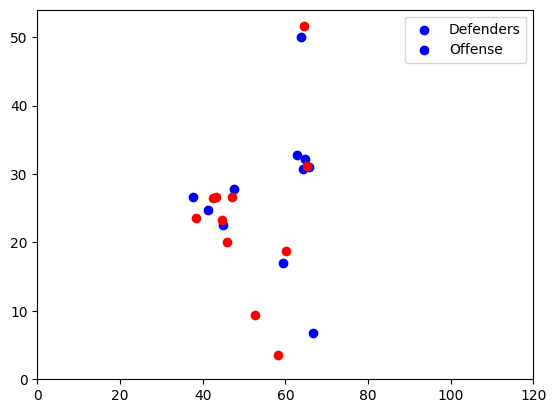

In [54]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani 

from matplotlib.animation import FuncAnimation 

fig, ax = plt.subplots()
defenders = [ax.scatter(dx_list[i][1], dy_list[i][1], color='blue') for i in range(11)]
offenders = [ax.scatter(ox_list[i][1], oy_list[i][1], color='red') for i in range(11)]
ax.axis([0, 120, 0, 54])
ax.legend(['Defenders', 'Offense'])

def update(frame):
    for i in range(11):
        defenders[i].set_offsets([dx_list[i][frame+1], dy_list[i][frame+1]])
        offenders[i].set_offsets([ox_list[i][frame+1], oy_list[i][frame+1]]) 
    return defenders + offenders

a = FuncAnimation(fig, update, frames=len(dx_list[0]), blit=True, interval=100)
a.save('animation.gif', writer='ffmpeg', fps=10)

plt.show()

In [22]:
print(dx_list)

[1      52.88
2      53.01
3      53.13
4      53.25
5      53.38
       ...  
203    64.40
204    64.53
205    64.64
206    64.72
207    64.79
Name: player_x, Length: 207, dtype: float64, 1      50.78
2      50.88
3      50.97
4      51.05
5      51.14
       ...  
203    58.09
204    58.46
205    58.81
206    59.16
207    59.50
Name: player_x, Length: 207, dtype: float64, 1      52.17
2      52.22
3      52.28
4      52.34
5      52.40
       ...  
203    63.92
204    63.87
205    63.84
206    63.82
207    63.81
Name: player_x, Length: 207, dtype: float64, 1      47.44
2      47.48
3      47.52
4      47.55
5      47.59
       ...  
203    41.32
204    41.32
205    41.31
206    41.31
207    41.31
Name: player_x, Length: 207, dtype: float64, 1      51.16
2      51.22
3      51.27
4      51.32
5      51.35
       ...  
203    63.12
204    63.48
205    63.80
206    64.07
207    64.29
Name: player_x, Length: 207, dtype: float64, 1      54.77
2      54.86
3      54.95
4      55.05
5      

In [23]:
print(dy_list)

[1      26.99
2      27.03
3      27.06
4      27.10
5      27.13
       ...  
203    32.31
204    32.25
205    32.19
206    32.16
207    32.14
Name: player_y, Length: 207, dtype: float64, 1      29.12
2      29.20
3      29.29
4      29.37
5      29.45
       ...  
203    16.10
204    16.33
205    16.56
206    16.78
207    17.01
Name: player_y, Length: 207, dtype: float64, 1      22.60
2      22.61
3      22.62
4      22.64
5      22.64
       ...  
203    50.47
204    50.38
205    50.26
206    50.13
207    49.99
Name: player_y, Length: 207, dtype: float64, 1      28.20
2      28.26
3      28.33
4      28.37
5      28.43
       ...  
203    24.38
204    24.47
205    24.56
206    24.65
207    24.74
Name: player_y, Length: 207, dtype: float64, 1      24.33
2      24.35
3      24.37
4      24.40
5      24.42
       ...  
203    30.05
204    30.25
205    30.43
206    30.61
207    30.75
Name: player_y, Length: 207, dtype: float64, 1      20.67
2      20.64
3      20.62
4      20.60
5      

In [24]:
print(ox_list)

[1      41.49
2      41.49
3      41.49
4      41.48
5      41.48
       ...  
203    44.60
204    44.94
205    45.28
206    45.62
207    45.95
Name: player_x, Length: 207, dtype: float64, 1      40.28
2      40.29
3      40.29
4      40.30
5      40.30
       ...  
203    57.70
204    57.81
205    57.92
206    58.01
207    58.11
Name: player_x, Length: 207, dtype: float64, 1      42.73
2      42.85
3      42.98
4      43.12
5      43.25
       ...  
203    46.02
204    46.26
205    46.50
206    46.74
207    46.98
Name: player_x, Length: 207, dtype: float64, 1      40.61
2      40.68
3      40.76
4      40.84
5      40.92
       ...  
203    64.89
204    64.98
205    65.06
206    65.13
207    65.16
Name: player_x, Length: 207, dtype: float64, 1      43.01
2      43.22
3      43.43
4      43.66
5      43.90
       ...  
203    43.54
204    43.80
205    44.09
206    44.38
207    44.67
Name: player_x, Length: 207, dtype: float64, 1      41.32
2      41.38
3      41.44
4      41.51
5      

In [25]:
print(oy_list)

[1      22.88
2      22.93
3      22.99
4      23.06
5      23.12
       ...  
203    20.11
204    20.08
205    20.05
206    20.03
207    20.02
Name: player_y, Length: 207, dtype: float64, 1      24.11
2      24.15
3      24.20
4      24.24
5      24.26
       ...  
203     3.08
204     3.21
205     3.34
206     3.48
207     3.61
Name: player_y, Length: 207, dtype: float64, 1      22.94
2      22.93
3      22.93
4      22.91
5      22.90
       ...  
203    26.65
204    26.65
205    26.64
206    26.64
207    26.63
Name: player_y, Length: 207, dtype: float64, 1      26.62
2      26.87
3      27.15
4      27.42
5      27.71
       ...  
203    31.37
204    31.30
205    31.22
206    31.15
207    31.10
Name: player_y, Length: 207, dtype: float64, 1      23.91
2      23.91
3      23.92
4      23.92
5      23.92
       ...  
203    22.97
204    23.04
205    23.13
206    23.22
207    23.34
Name: player_y, Length: 207, dtype: float64, 1      25.95
2      26.18
3      26.43
4      26.71
5      

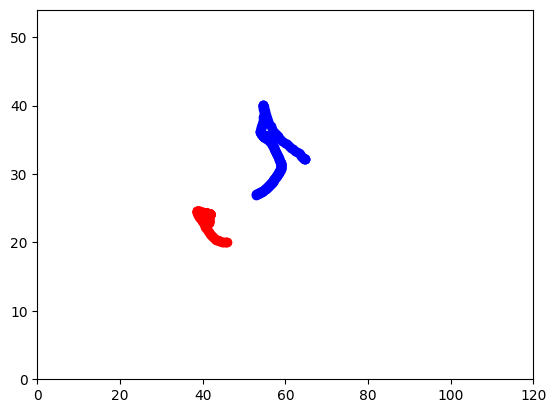

In [44]:
plt.scatter(dx_list[0], dy_list[0], color='blue')  # Check the first frame of defense points
plt.scatter(ox_list[0], oy_list[0], color='red')  # Check the first frame of offense points
plt.xlim(0, 120)  # Adjust if necessary
plt.ylim(0, 54)   # Adjust if necessary
plt.show()


In [1]:
import pandas as pd 
import extract 

import numpy as np 

week_1 = pd.read_csv('data/tracking_week_1.csv')
week_2 = df = pd.read_csv("data/tracking_week_2.csv")

In [2]:
week_1

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091200,64,35459.0,Kareem Jackson,1,BEFORE_SNAP,2022-09-13 00:16:03.5,22.0,DEN,right,51.06,28.55,0.72,0.37,0.07,246.17,68.34,huddle_break_offense
1,2022091200,64,35459.0,Kareem Jackson,2,BEFORE_SNAP,2022-09-13 00:16:03.6,22.0,DEN,right,51.13,28.57,0.71,0.36,0.07,245.41,71.21,NaN
2,2022091200,64,35459.0,Kareem Jackson,3,BEFORE_SNAP,2022-09-13 00:16:03.7,22.0,DEN,right,51.20,28.59,0.69,0.23,0.07,244.45,69.90,NaN
3,2022091200,64,35459.0,Kareem Jackson,4,BEFORE_SNAP,2022-09-13 00:16:03.8,22.0,DEN,right,51.26,28.62,0.67,0.22,0.07,244.45,67.98,NaN
4,2022091200,64,35459.0,Kareem Jackson,5,BEFORE_SNAP,2022-09-13 00:16:03.9,22.0,DEN,right,51.32,28.65,0.65,0.34,0.07,245.74,62.83,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104695,2022090800,3696,NaN,football,171,AFTER_SNAP,2022-09-09 03:07:37.7,NaN,football,left,1.70,0.62,14.42,5.36,1.47,NaN,NaN,pass_outcome_incomplete
7104696,2022090800,3696,NaN,football,172,AFTER_SNAP,2022-09-09 03:07:37.8,NaN,football,left,0.59,0.01,3.60,0.06,1.27,NaN,NaN,NaN
7104697,2022090800,3696,NaN,football,173,AFTER_SNAP,2022-09-09 03:07:37.9,NaN,football,left,0.23,-0.07,3.60,0.23,0.38,NaN,NaN,NaN
7104698,2022090800,3696,NaN,football,174,AFTER_SNAP,2022-09-09 03:07:38,NaN,football,left,-0.13,-0.17,3.63,0.06,0.37,NaN,NaN,NaN


In [3]:
week_2

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022091901,64,37078.0,Patrick Peterson,1,BEFORE_SNAP,2022-09-20 00:32:03.3,7.0,MIN,right,33.450000,20.170000,1.59,0.52,0.16,3.19,165.91,huddle_break_offense
1,2022091901,64,37078.0,Patrick Peterson,2,BEFORE_SNAP,2022-09-20 00:32:03.4,7.0,MIN,right,33.490000,20.020000,1.58,0.42,0.16,1.34,166.20,NaN
2,2022091901,64,37078.0,Patrick Peterson,3,BEFORE_SNAP,2022-09-20 00:32:03.5,7.0,MIN,right,33.530000,19.860000,1.58,0.28,0.16,357.20,164.50,NaN
3,2022091901,64,37078.0,Patrick Peterson,4,BEFORE_SNAP,2022-09-20 00:32:03.6,7.0,MIN,right,33.580000,19.710000,1.59,0.26,0.16,353.77,163.67,NaN
4,2022091901,64,37078.0,Patrick Peterson,5,BEFORE_SNAP,2022-09-20 00:32:03.7,7.0,MIN,right,33.620000,19.560000,1.58,0.34,0.16,351.27,162.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704334,2022091500,4076,NaN,football,90,AFTER_SNAP,2022-09-16 03:13:01,NaN,football,right,65.330002,29.799999,1.30,6.26,0.10,NaN,NaN,qb_kneel
6704335,2022091500,4076,NaN,football,91,AFTER_SNAP,2022-09-16 03:13:01.1,NaN,football,right,65.169998,29.790001,1.88,5.68,0.16,NaN,NaN,NaN
6704336,2022091500,4076,NaN,football,92,AFTER_SNAP,2022-09-16 03:13:01.2,NaN,football,right,64.980003,29.780001,2.31,4.52,0.20,NaN,NaN,NaN
6704337,2022091500,4076,NaN,football,93,AFTER_SNAP,2022-09-16 03:13:01.3,NaN,football,right,64.750000,29.780001,2.58,3.11,0.23,NaN,NaN,NaN


In [4]:
plays = pd.read_csv('data/plays.csv')

In [5]:
plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,4,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,6,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,4,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,-1,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,2022110604,1051,(12:49) (Shotgun) T.Lawrence pass incomplete s...,2,3,4,JAX,LV,JAX,31,...,0,-0.024741,0.024741,-1.391687,True,NaN,NaN,0,Cover-2,Zone
16120,2022103005,3492,(12:32) (Shotgun) K.Cousins pass incomplete de...,4,1,10,MIN,ARI,MIN,25,...,0,-0.026580,0.026580,-0.503208,True,NaN,NaN,0,Cover-3,Zone
16121,2022092502,2337,(9:59) (Shotgun) P.Mahomes scrambles right end...,3,1,10,KC,IND,IND,13,...,10,-0.013790,0.013790,1.073898,True,NaN,NaN,0,Quarters,Zone
16122,2022091809,719,(:45) C.Rush pass incomplete deep right to C.L...,1,1,10,DAL,CIN,CIN,47,...,0,-0.011561,0.011561,-0.522397,True,UNDEFINED,NaN,0,Cover-3,Zone


In [6]:
playscoverage = plays[plays['pff_passCoverage'] == 'Cover-3']
playscoverage

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,9,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone
19,2022100207,681,(4:32) R.Tannehill pass deep left to C.Okonkwo...,1,1,10,TEN,IND,IND,42,...,23,-0.051718,0.051718,1.438245,True,OUTSIDE ZONE,NaN,0,Cover-3,Zone
22,2022091111,923,(11:59) J.Herbert pass deep right to K.Allen t...,2,1,10,LAC,LV,LAC,47,...,42,0.048007,-0.048007,2.483530,True,INSIDE ZONE,NaN,0,Cover-3,Zone
27,2022101601,2344,(10:13) (No Huddle) K.Hunt right tackle to CLV...,3,1,10,CLE,NE,CLE,36,...,1,0.000048,-0.000048,-0.467615,False,OUTSIDE ZONE,NaN,0,Cover-3,Zone
37,2022101609,888,(14:24) G.Smith pass short left to N.Fant to S...,2,2,7,SEA,ARI,SEA,23,...,6,0.024585,-0.024585,0.683543,True,OUTSIDE ZONE,NaN,0,Cover-3,Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16109,2022103011,2726,(:36) S.Barkley right end to NYG 49 for -1 yar...,3,2,8,NYG,SEA,NaN,50,...,-1,0.038238,-0.038238,-1.078541,False,PULL LEAD,PITCH,0,Cover-3,Zone
16112,2022102303,1153,(8:50) (Shotgun) J.Goff pass short right to C....,2,3,14,DET,DAL,DAL,35,...,1,0.004773,-0.004773,-0.827386,True,NaN,NaN,0,Cover-3,Zone
16120,2022103005,3492,(12:32) (Shotgun) K.Cousins pass incomplete de...,4,1,10,MIN,ARI,MIN,25,...,0,-0.026580,0.026580,-0.503208,True,NaN,NaN,0,Cover-3,Zone
16122,2022091809,719,(:45) C.Rush pass incomplete deep right to C.L...,1,1,10,DAL,CIN,CIN,47,...,0,-0.011561,0.011561,-0.522397,True,UNDEFINED,NaN,0,Cover-3,Zone
